<h3><div align="left"> Université Paris Cité </div> <div align="right"> Année 2023-2024</div></h3>
<h3><div align="center">Master 2 - MMA</div></h3>
<h3><div align="center">Optimisation</div></h3>
<h3><div align="center">Olivier BOUËT-WILLAUMEZ</div></h3>
<h1><div align="center">TP 2 - Méthodes primales-duales</div></h1>

On cherche à nouveau à trouver une inconnue $u$ à partir de la donnée bruitée $d= Au+b$. On suppose maintenant que $u$ n'est plus parcimonieuse, mais constante par morceaux.

Plus précisement, on a

$$ A = \begin{pmatrix}10&7&8&7\\7&5&6&5\\8&6&10&9\\7&5&9&10\end{pmatrix}, \ u = \begin{pmatrix}1\\2\\2\\2\end{pmatrix}, \text{et}\ b=\begin{pmatrix}0.1\\-0.1\\0.1\\-0.1\end{pmatrix} $$

On se propose donc d'estimer  $u$ en minimisant la fonction

$$f:x\mapsto\frac{1}{2}||Ax-d||_{2}^{2}+\lambda||Dx||_{1},$$

où $$D =\begin{pmatrix}1&-1&0&0\\0&1&-1&0\\0&0&1&-1\end{pmatrix}$$

### 1.

**(a)** Construire la donnée $d$ et trouver une première estimation de $u$ en lui appliquant la matrice inverse $A^{-1}$. Constater que le problème est toujours mal posé.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

*Définition des données:*

In [2]:
A=np.array([[10,7,8,7],[7,5,6,5],[8,6,10,9],[7,5,9,10]])
u = np.reshape(np.array([1,2,2,2]),(4,1))
b = np.reshape(np.array([0.1,-0.1,0.1,-0.1]),(4,1))
inv_A = np.linalg.inv(A)
D=np.array([[1,-1,0,0],[0,1,-1,0],[0,0,1,-1]])

*Calcul de la donnée $d$ et de* `u_retrouve`:

In [3]:
d = A@u + b
u_retrouve = inv_A@d
print(u_retrouve)

[[  9.2]
 [-11.6]
 [  5.5]
 [ -0.1]]


<u>Commentaire:</u> En raison du léger bruit $b$, on constate que $A^{-1}d$ est très loin de $u$. Cela vient du fait que $A$ n'est pas bien conditionnée comme nous le montre la cellule de code suivante.

In [4]:
cond_A=max(np.abs(np.linalg.eigvals(A)))/min(np.abs(np.linalg.eigvals(A)))
print(cond_A)

2984.092701676514


**(b)** La fonction $f$ possède-t-elle un unique minimiseur ?

<u>Commentaire:</u> La fonction $f$ est continue et coercive donc il y'a existence d'un minimiseur qui est en plus unique de pars la stricte convexité de $f$.

### 2. *Méthode Duale*

**(a)** Calculer la transformée de *Legendre-Fenchel* de la fonction $$ f_1 :x \mapsto \frac{1}{2}||Ax-d||^2_2$$

et le gradient de la fonction $y \mapsto f_1^*(-D^Ty)$.

La transformée de *Legendre-Fenchel* de $f_1$ est définie par: $f_1^*(x)=\underset{y\in E}{\text{sup}}\big{(}\langle x,y \rangle - \frac{1}{2}||Ay-d||^2_2\big{)} = \underset{y\in E}{\text{sup}} \big{(}\Psi(y)\big{)}$.

La fonction $y \mapsto \Psi(y)$ étant concave strictement et différentiable, le point $\tilde{y}$ qui annule son gradient est alors un $\text{argmax}$.

On a que $\nabla \Psi(y) = x - A^T(Ay-d)$ en différentiant par rapport à $y$, et il vient que: 

$$\begin{align}
\nabla \Psi(\tilde{y}) = 0  & \iff x - A^T(A\tilde{y}-d)=0 \\
& \iff x + A^Td = A^TA\tilde{y} \\
& \iff \tilde{y} = (A^TA)^{-1}(x+A^Td)
\end{align}
$$

On a finalement que:
$$\begin{align}
f_1^*(x) & = \underset{y\in E}{\text{sup}}\big{(}\langle x,y \rangle - \frac{1}{2}||Ay-d||^2_2\big{)} \\
         & = \langle x,\tilde{y} \rangle - \frac{1}{2}||A\tilde{y}-d||^2_2 \\
         & = \langle x,(A^TA)^{-1}(x+A^Td)\rangle - \frac{1}{2}||A(A^TA)^{-1}(x+A^Td)-d||^2_2 \\
         & = \langle x,(A^TA)^{-1}(x+A^Td)\rangle - \frac{1}{2}||A(A^TA)^{-1}(x+A^Td)||^2_2 -\frac{1}{2}||d||^2_2+\langle A(A^TA)^{-1}(x+A^Td),d\rangle \\
         & = \langle x,(A^TA)^{-1}(x+A^Td)\rangle - \frac{1}{2}||(A^T)^{-1}x+d||^2_2 -\frac{1}{2}||d||^2_2 + \langle (A^TA)^{-1}(x+A^Td),A^Td\rangle \\
         & = \langle x + A^Td,(A^TA)^{-1}(x+A^Td)\rangle - \frac{1}{2}||(A^T)^{-1}x+d||^2_2 -\frac{1}{2}||d||^2_2 \\
         & = \langle (A^T)^{-1}(x + A^Td),(A^T)^{-1}(x+A^Td)\rangle - \frac{1}{2}||(A^T)^{-1}x+d||^2_2 -\frac{1}{2}||d||^2_2 \\
         & = ||(A^T)^{-1}(x + A^Td)||^2_2 - \frac{1}{2}||(A^T)^{-1}x+d||^2_2 -\frac{1}{2}||d||^2_2 \\
         & = \frac{1}{2}||(A^T)^{-1}x +d||^2_2 -\frac{1}{2}||d||^2
\end{align}
$$  

On a alors que 
$$\begin{align}
f_1^*(-D^Ty) & = \frac{1}{2}||-(A^T)^{-1}D^Ty +d||^2_2 -\frac{1}{2}||d||^2 \\
             & = \frac{1}{2}||(A^T)^{-1}D^Ty -d||^2_2 -\frac{1}{2}||d||^2 
\end{align}
$$    

La fonction $y \mapsto f_1^*(-D^Ty)$ étant différentiable comme somme de deux fonctions elles mêmes différentiables, il vient directement que:

$$\begin{align}
\nabla f_1^*(-D^Ty) & = \big{(}(A^T)^{-1}D^T\big{)}^T \big{(}(A^T)^{-1}D^Ty -d \big{)} \\
                    & = DA^{-1}\big{(}(A^T)^{-1}D^Ty-d\big{)} \\
                    & = (DA^{-1})(DA^{-1})^Ty -DA^{-1}d
\end{align}
$$


Définissons alors une fonction `gradient_f1_etoile` qui calcule ce gradient pour un $y$ donné:

In [5]:
def gradient_f1_etoile(y):
    return (D@inv_A)@(D@inv_A).T@y-D@inv_A@d

**(b)** Calculer la transformée de *Legendre-Fenchel* de $f_2=\lambda||\cdot||_1$ et l'opérateur proximal $\text{prox}_{\tau f_2^*}$, où $\tau >0$. 

Soit $f_2 = \lambda||\cdot||_1 $, nous avons vu dans un exemple du cours que la transformée de *Legendre-Fenchel* de $f_2$ est alors donnée par:

$$f_2^*(x) = \mathcal{I}_{\bar{B}(0,\lambda)_{||\cdot||_\infty}}(x)$$

Comme l'indicatrice est invariante par multiplication par une constante, on a que:

$$\begin{align}
prox_{\tau f_2^*}(x) & = prox_{f_2^*}(x) \\
                & =  \underset{z \in E}{\text{argmin}}\big{(}\frac{1}{2}||z-x||^2_2 +\mathcal{I}_{\bar{B}(0,\lambda)_{||\cdot||_\infty}}(z)\big{)} \\
                & =  \underset{z \in \bar{B}(0,\lambda)_{||\cdot||_\infty}}{\text{argmin}}\big{(}\frac{1}{2}||z-x||^2_2\big{)} \\
                & = \text{proj}_{\bar{B}(0,\lambda)_{||\cdot||_\infty}}(x) \\
                & = \big{(}\text{proj}_{[-\lambda,\lambda]}(x_k)\big{)}_k
\end{align}
$$

Codons une fonction `prox_f2_etoile` qui implémente cet opérateur.

In [6]:
def prox_f2_etoile(x,lambd):
    return -lambd*(x<=-lambd)+lambd*(x>=lambd)+x*(np.abs(x)<lambd)

**(c)** Minimiser la fonction
$$ y \mapsto f_1^*(-D^Ty) +f_2^*(y)$$
à l'aide de l'algorithme `FISTA`.

Définissons dans un premier temps cet algorithme.

In [7]:
def FISTA(x0,lambd,tau,Niter):
    x = x0
    y = x0
    t = 1
    for n in range (Niter):
        x_1 = prox_f2_etoile(y-tau*gradient_f1_etoile(y),lambd)
        t_1 = (1+np.sqrt(1+4*t**2))/2
        y = x_1 + (t-1)*(x_1-x)/t_1
        x = x_1
        t = t_1       
    return x

**(d)** En déduire le minimiseur de $f$.

On définit pour commencer la fonction $f$ qui nous sera utile par la suite.

In [8]:
def f(x,lambd):
    return (1/2)*np.linalg.norm(A@x-d)**2+lambd*np.sum(np.abs(D@x))

On initialise l'algorithme avec certaines valeurs, le pas est choisi comme étant une constante de *Lipschitz* de $\nabla f_1^*$.

In [9]:
x0 = np.zeros((3,1))
lambd = 0.1
L = np.max(np.abs(np.linalg.eigvals((D@inv_A)@(D@inv_A).T)))
pivot = np.linalg.inv(A.T@A)@D.T
tau = 1/L

Le minimiseur $\hat{x}$ de $f$ est obtenu en faisant un retour dans l'espace de départ à l'aide de $\hat{y}$ de la manière suivante: 

$$\begin{align}
\hat{x} & = \nabla f_1^*(-D^T\hat{y})\\
        & = A^{-1}\big{(}(A^T)^{-1}(-D^T\hat{y}) +d\big{)} \\
        & = -(A^TA)^{-1}D^T\hat{y} +A^{-1}d
\end{align}$$

Création des données pour l'affichage simultané en question **5.**

In [10]:
N_values_FISTA = np.arange(20,1300,10,dtype=int)
list_min_FISTA = []
for n in N_values_FISTA:
    x_chap = -pivot@FISTA(x0,lambd,tau,n)+inv_A@d
    value = f(x_chap,lambd)    
    list_min_FISTA.append(value)

On trouve donc le minimiseur $\hat{u}$:

In [11]:
print(-pivot@FISTA(x0,lambd,tau,2000)+inv_A@d)

[[1.41416431]
 [1.41426699]
 [2.00430509]
 [2.00389342]]


On peut afficher $f(\hat{x})$ en fonction du nombre d'itérations pour réaliser que la fonction $f$ est belle et bien minimisée par l'algorithme, cepandant ce n'est pas très significatif d'afficher l'écart de $u$ à $\hat{x}$ car l'algorithme ne converge pas exactement vers la solution en raison du bruit trop grand.

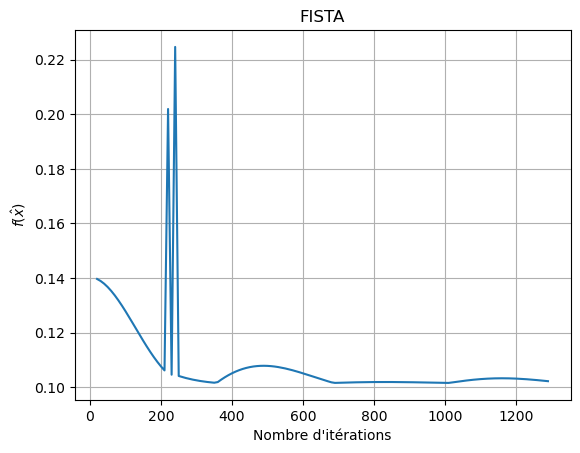

In [12]:
plt.plot(N_values_FISTA,list_min_FISTA)
plt.xlabel("Nombre d'itérations")
plt.ylabel(r'$f(\hat{x})$')
plt.title("FISTA")
plt.grid(True)
plt.show()

### 3. *Méthode primale-duale de Chambolle-Pock*

**(a)** Pourquoi l'algorithme primal-dual de *Chambolle-Pock* est-il bien adapté pour trouver un minimiseur de la fonction $f$ ?

<u>Commentaire:</u> Trouver un minimiseur de la fonction $f:x\mapsto\frac{1}{2}||Ax-d||_{2}^{2}+\lambda||Dx||_{1}$ revient à chercher un $\hat{x}$ tel que 

$$\hat{x} \in \underset{x \in E}{\text{argmin}}(\frac{1}{2}||Ax-d||_{2}^{2}+\lambda||Dx||_{1})$$

En posant $f_1(x)=\frac{1}{2}||Ax-d||_{2}^{2}$ ainsi que $f_2(x)=\lambda||x||_{1}$, notre problème d'optimisation revient alors à trouver: 

$$\hat{x} \in \underset{x \in E}{\text{argmin}}(f_1(x)+f_2(Dx))$$

$f_1$ et $f_2$ étant des fonctions qui appartiennent toutes les deux à $\Gamma_0(E)$ et qui sont simples, l'algorithme de *Chambolle-Pock* est alors bien défini et adapté au problème.

**(b)** Calculer $\text{prox}_{\tau f_1}$.

Nous avons vu en TD que l'opérateur proximal de la fonction $(\Phi:x\mapsto \frac{\tau}{2}||Ax-d||^2)$ est donné par:

$$ prox_{\Phi}(x)= (Id +\tau A^TA)^{-1}(x+\tau A^Td)$$

En effet,
$$\begin{align}
prox_{\Phi}(x) & = \underset{z\in E}{\text{argmin}}\big{(}\frac{1}{2}||z-x||^2+\Phi(z)\big{)}, \forall x \in E \\
& = \underset{z\in E}{\text{argmin}}\big{(}\frac{1}{2}||z-x||^2+\frac{\tau}{2}||Az-d||^2\big{)}, \forall x \in E 
\end{align}$$

Posons $\Gamma(z)=\frac{1}{2}||z-x||^2+\frac{\tau}{2}||Az-d||^2,\forall x \in E $, c'est une somme de deux fonctions différentiables strictement convexes. Le point $\tilde{z}$ qui annule son gradient est donc la solution de notre problème.

On peut voir facilement que $\nabla \Gamma(z)=z-x +\tau A^T(Az-d)$ et donc on a bien que $\tilde{z}=(Id +\tau A^TA)^{-1}(x+\tau A^Td)$.

**(c)** Obtenir le minimiseur de $f$ à l'aide de l'algorithme de *Chambolle-Pock*.

Pour commencer, définissons l'opérateur proximal de $\Phi$ `prox_Phi`.

In [13]:
def prox_Phi(x,tau):
    return np.linalg.inv(np.eye(4)+tau*(A.T@A))@(x+tau*(A.T@d))

Définissons maintenant l'algorithme de `Chambolle_Pock`. (On choisi ici $\theta=1$)

In [14]:
def Chambolle_Pock(x0,lambd,tau,sigma,Niter):
    y = np.zeros((3,1))
    x = x0
    z = x0
    x_pivot = x0
    for n in range (Niter):
        y = prox_f2_etoile(y + sigma*D@z,lambd)
        x_pivot = prox_Phi(x_pivot - tau*D.T@y,tau)
        z = 2*x_pivot -x
        x = x_pivot
    return x

On initialise l'algorithme avec $x_0,z_0 \in E$ ainsi que $y_0 \in E'$, on prend $\tau$ très petit et $\sigma$ qui respecte $\sigma < \frac{1}{\tau |||D|||^2}$.

In [15]:
x0 = np.zeros((4,1))
lambd = 0.1
tau = 0.001
norm_D=np.max(np.abs(np.linalg.eigvals(D.T@D)))**2
sigma = 1/((2*norm_D**2)*tau)
Niter=3000

Création des données pour l'affichage simultané en question **5.**

In [16]:
N_values_CP = np.arange(20,1300,10,dtype=int)
list_min_CP = []
for n in N_values_CP:
    value = f(Chambolle_Pock(x0,lambd,tau,sigma,n),lambd)    
    list_min_CP.append(value)

On trouve donc le minimiseur $\hat{u}$:

In [17]:
print(Chambolle_Pock(x0,lambd,tau,sigma,Niter))

[[1.41424797]
 [1.4142483 ]
 [2.00407064]
 [2.00407059]]


### 4.  *Méthode primale-duale généralisée par Condat et Vu*

**(a)** Lorsque l'opérateur $A$ prend une forme plus complexe, il est plus facile de faire une descente de gradient explicite sur $f_1$. Calculer le gradient de $f_1$.

On rappelle que $f_1(x)=\frac{1}{2}||Ax-d||_{2}^{2}$. En différentiant, il vient directement que $\nabla f_1(x)=A^T(Ax-d)$.

Définissons alors une fonction `gradient_f1`.

In [18]:
def gradient_f1(x):
    return A.T@(A@x-d)

**(b)** Obtenir le minimiseur de $f$ à l'aide de l'algorithme proposé par *Condat et Vu*, en faisant une descente de gradient explicite sur la variable primale.

Implémentons l'algorithme `Condat_et_Vu`. (On choisi ici $\theta=1$)

In [19]:
def Condat_et_Vu(x0,lambd,tau,sigma,Niter):
    y = np.zeros((3,1))
    x = x0
    z = x0
    x_pivot = x0
    for n in range (Niter):
        y = prox_f2_etoile(y + sigma*D@z,lambd)
        x_pivot = x_pivot -tau*(D.T@y+gradient_f1(x_pivot))
        z = 2*x_pivot -x
        x = x_pivot
    return x

On initialise l'algorithme avec $x_0,z_0 \in E$ ainsi que $y_0 \in E'$, on prend $\tau$ très petit et $\sigma$ qui respecte $\big{(} \frac{1}{\tau}-L \big{)}\frac{1}{\sigma}>|||D|||^2$.

In [20]:
x0 = np.zeros((4,1))
lambd = 0.1
tau = 0.001
norm_D = np.max(np.abs(np.linalg.eigvals(D.T@D)))**2
L = np.max(np.abs(np.linalg.eigvals(A.T@A)))
sigma = ((1/tau)-L)*(1/2*norm_D)
Niter=3000

Création des données pour l'affichage simultané en question **5.**

In [21]:
N_values_CV = np.arange(20,1300,10,dtype=int)
list_min_CV = []
for n in N_values_CV:
    value = f(Condat_et_Vu(x0,lambd,tau,sigma,n),lambd)    
    list_min_CV.append(value)

On trouve donc le minimiseur $\hat{u}$:

In [22]:
print(Condat_et_Vu(x0,lambd,tau,sigma,Niter))

[[1.41424812]
 [1.41424812]
 [2.0040706 ]
 [2.0040706 ]]


### 5 . *PAPC*

**(a)** Pourquoi l'algorithme *PAPC* est-il lui-aussi bien adapté à ce problème d'optimisation ?

<u>Commentaire:</u> Trouver un minimiseur de la fonction $f:x\mapsto\frac{1}{2}||Ax-d||_{2}^{2}+\lambda||Dx||_{1}$ revient à chercher un $\hat{x}$ tel que 

$$\hat{x} \in \underset{x \in E}{\text{argmin}}(\frac{1}{2}||Ax-d||_{2}^{2}+\lambda||Dx||_{1})$$

En posant $f_1(x)=\frac{1}{2}||Ax-d||_{2}^{2}$ ainsi que $f_2(x)=\lambda||x||_{1}$, notre problème d'optimisation revient alors à trouver: 

$$\hat{x} \in \underset{x \in E}{\text{argmin}}(f_1(x)+f_2(Dx))$$

avec ici, $f_1$ qui est différentiable et $f_2$ simple. Donc l'algorithme *PAPC* est bien adapté à ce problème d'optimisation.

**(b)** Obtenir le minimiseur de $f$ à l'aide de l'algorithme *PAPC*.

Implémentons l'algorithme `PAPC`.

In [23]:
def PAPC(x0,lambd,tau,sigma,Niter):
    y = np.zeros((3,1))
    x = x0
    z = x0
    for n in range (Niter):
        z = x -tau*(gradient_f1(x)+(D.T)@y)
        y = prox_f2_etoile(y+sigma*(D@z),lambd)
        x = x -tau*(gradient_f1(x)+(D.T)@y)
        
    return x

On initialise l'algorithme avec $x_0 \in E$ ainsi que $y_0 \in E'$, on prend $\tau$ tel que $\tau\leq \frac{1}{L}$, avec $L = max\big{\{}|\mu| \ \text{tq}\ \mu \ \text{est une vp de}\ A^TA \big{\}}$, et $\sigma$ qui respecte $\sigma < \frac{1}{\tau |||D|||^2}$.

In [24]:
x0 = np.zeros((4,1))
lambd = 0.1
L=np.max(np.abs(np.linalg.eigvals(A.T@A)))
tau = 1/L
norm_D=np.max(np.abs(np.linalg.eigvals(D.T@D)))**2
sigma = 1/(2*tau*norm_D)
Niter=3000

Création des données pour l'affichage simultané en question **5.**

In [25]:
N_values_PAPC = np.arange(20,1300,10,dtype=int)
list_min_PAPC = []
for n in N_values_PAPC:
    value = f(PAPC(x0,lambd,tau,sigma,n),lambd)    
    list_min_PAPC.append(value)

On trouve donc le minimiseur $\hat{u}$:

In [26]:
print(PAPC(x0,lambd,tau,sigma,Niter))

[[1.41424812]
 [1.41424812]
 [2.0040706 ]
 [2.0040706 ]]


**(c)** Comparer les vitesses de convergence des quatre algorithmes.

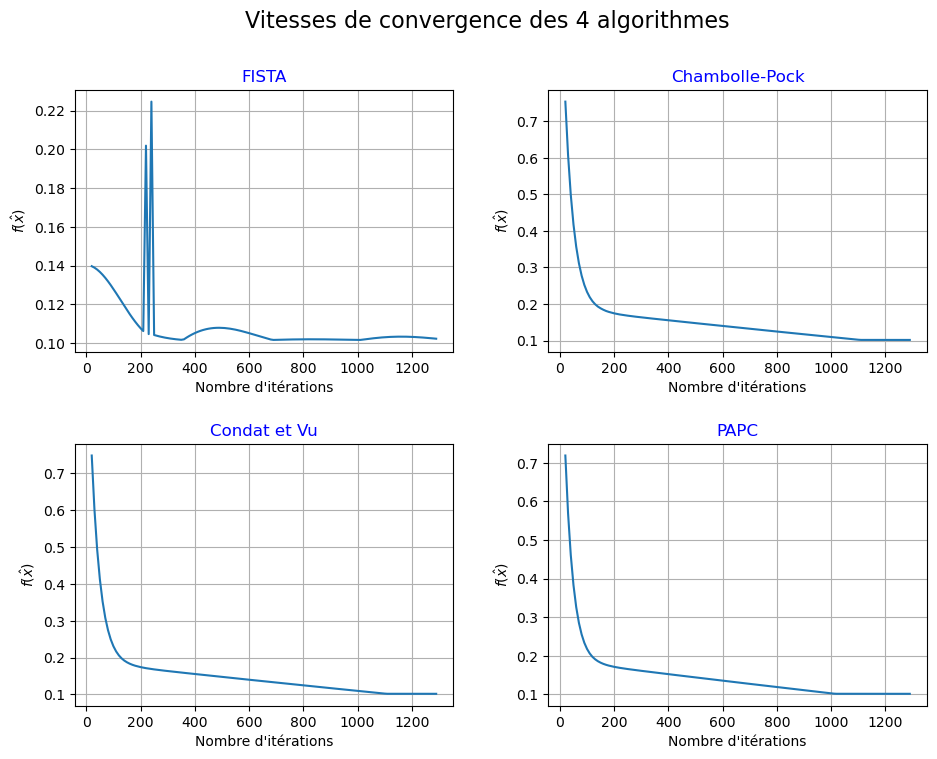

In [27]:
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(11,8))
plt.subplots_adjust(hspace=0.35,wspace=0.25)
fig.suptitle('Vitesses de convergence des 4 algorithmes', fontsize=16)

plt.subplot(221)
plt.plot(N_values_FISTA,list_min_FISTA)
plt.grid(True)
plt.title("FISTA",color="blue")
plt.xlabel("Nombre d'itérations")
plt.ylabel(r'$f(\hat{x})$')
plt.subplot(222)
plt.plot(N_values_CP,list_min_CP)
plt.title("Chambolle-Pock",color="blue")
plt.xlabel("Nombre d'itérations")
plt.ylabel(r'$f(\hat{x})$')
plt.grid(True)
plt.subplot(223)
plt.plot(N_values_CV,list_min_CV)
plt.title("Condat et Vu",color="blue")
plt.xlabel("Nombre d'itérations")
plt.ylabel(r'$f(\hat{x})$')
plt.grid(True)
plt.subplot(224)
plt.plot(N_values_PAPC,list_min_PAPC)
plt.title("PAPC",color="blue")
plt.xlabel("Nombre d'itérations")
plt.ylabel(r'$f(\hat{x})$')
plt.grid(True)
plt.show()

**(d)** Si on suppose que les vecteurs $d$ et $u$ sont de grande dimension et que $A$ est un opérateur non inversible pour lequel on peut calculer rapidement $A^TAx$, pour tout $x$, quel serait l'algorithme le mieux adapté pour minimiser la fonction $f$ ?

<u>Commentaire:</u> Dans ce contexte, si l'on sait calculer rapidement $A^TAx$ pour tout $x$, et que $A$ est un opérateur non inversible, alors il vaut mieux se tourner vers les algorithmes `Condat_et_Vu` ou bien `PAPC`, car ils requièrent à chaque itération une évaluation de  $\nabla f_1(x)=A^T(Ax-d)$ qui est alors "rapide" à calculer.

L'algorithme `PAPC` semble par ailleurs avoir une convergence plus rapide vers le minimiseur donc on peut choisir cet algorithme, d'après nos résultats aux questions précédentes.

### 6. *Méthode primal-dual généralisée par Condat et Vu (suite)*

**(a)** On sait maintenant que $u_4 -u_3+u_2-u_1=1$. Afin de tenir compte de cette information, on se propose de minimiser la fonction $x\mapsto f(x)$, sous la contrainte $x_4 -x_3+x_2-x_1=1$. Pourquoi l'algorithme de *Condat et Vu* est-il bien adapté à ce problème d'optimisation ?

<u>Commentaire:</u> Minimiser $f(x)$ sous la contrainte $C=\big{\{}x\in R^4 \ \big{/} \ x_4 -x_3+x_2-x_1=1 \big{\}}$ revient à minimiser la fonction $\tilde{f}:x \mapsto f(x) + \mathcal{I}_C(x)$.

On a alors que $\tilde{f}(x) = f_0(x) +f_1(x)+f_2(Ax) $, avec $f_0(x)=\mathcal{I}_C(x)$ qui est une fonction simple, $f_1(x)=\frac{1}{2}||Ax-d||_{2}^{2}$ une fonction différentiable, de gradient *Lipschitzien*, et $f_2(x)=\lambda||x||_{1}$ également une fonction simple.

L'algorithme de *Condat et Vu* est alors bien adapté à ce problème d'optimisation.

**(b)** Calculer l'opérateur proximal de la fonction indicatrice de $C=\big{\{}x\in R^4 \ \big{|} \ x_4 -x_3+x_2-x_1=1 \big{\}}$.

On a que:
$$\begin{align}
prox_{f_0}(x) & =  \underset{z \in E}{\text{argmin}}\big{(}\frac{1}{2}||z-x||^2_2 +\mathcal{I}_C(z)\big{)}\\
                & =  \underset{z \in C}{\text{argmin}}\big{(}\frac{1}{2}||z-x||^2_2\big{)} \\
                & = \text{proj}_{C}(x) \\
\end{align}
$$

Or, $C$ étant un hyperplan de $R^4$, de la forme $C=\big{\{}x\in R^4 \ \big{|} \ \langle u , x \rangle = b \big{\}}$, avec ici , $ u =\begin{pmatrix}-1 , 1 ,-1 ,1 \end{pmatrix}$ et $b=1$.

Il vient que:

$$ \text{proj}_{C}(x)=x-\frac{\langle x,u\rangle-b}{||u||^2}u$$

On définit alors $prox_{f_0}(x)$ par la fonction `prox_f0`.

In [40]:
def prox_f0(x):
    u = np.reshape(np.array([-1,1,-1,1]),(4,1))
    b = 1
    return x-((np.sum(u*x)-b)/np.linalg.norm(u)**2)*u

**(c)** Résoudre ce problème d'optimisation et comparer la solution obtenue aux estimations de $u$ précédentes.

On définit pour cela un algorithme `Condat_et_Vu_evol`.

In [29]:
def Condat_et_Vu_evol(x0,lambd,tau,sigma,Niter):
    y = np.zeros((3,1))
    x = x0
    z = x0
    x_pivot = x0
    for n in range (Niter):
        y = prox_f2_etoile(y + sigma*D@z,lambd)
        x_pivot = prox_f0(x_pivot -tau*(D.T@y+gradient_f1(x_pivot)))
        z = 2*x_pivot -x
        x = x_pivot
    return x

Création des données pour l'affichage.

In [30]:
x0 = np.zeros((4,1))
lambd = 0.5
tau = 0.001
norm_D = np.max(np.abs(np.linalg.eigvals(D.T@D)))**2
L = np.max(np.abs(np.linalg.eigvals(A.T@A)))
sigma = ((1/tau)-L)*(1/2*norm_D)
Niter=3500

On trouve donc le minimiseur $\hat{u}$:

In [31]:
print(Condat_et_Vu_evol(x0,lambd,tau,sigma,Niter))

[[1.0003053]
 [2.0003053]
 [2.0003053]
 [2.0003053]]


Super, l'algorithme converge cette fois-ci exactement vers le $u$ souhaité. Affichons alors la différence en $||\cdot||_2$ entre $u$ et $\hat{u}$ au cours des itérations.

In [32]:
N_values_CV_evol = np.arange(50,3500,50,dtype=int)
list_min_CV_evol = []
for n in N_values_CV_evol:
    value = np.linalg.norm(Condat_et_Vu_evol(x0,lambd,tau,sigma,n)-u)
    list_min_CV_evol.append(value)

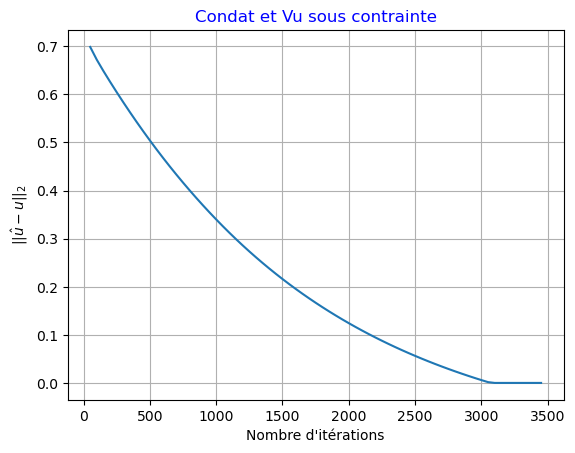

In [33]:
plt.plot(N_values_CV_evol,list_min_CV_evol)
plt.title("Condat et Vu sous contrainte",color="blue")
plt.xlabel("Nombre d'itérations")
plt.ylabel(r'$||\hat{u}-u||_2$')
plt.grid(True)
plt.show()

<u>Commentaire:</u> La solution obtenue est bien meilleure que celles obtenues via les algorithmes précédents. En effet $||\hat{u}-u||_2$ vaut $0$ dans ce cas là au bout de $3000$ itérations environ.

$||\hat{u}-u||_2$ dans le cas du dernier algorithme:

In [34]:
print(np.linalg.norm(Condat_et_Vu_evol(x0,lambd,tau,sigma,Niter)-u))

0.0006106022758811669


$||\hat{u}-u||_2$ pour les premiers algorithmes:

In [35]:
print(np.linalg.norm(PAPC(x0,lambd,tau,sigma,Niter)-u))

0.714118885998834
